In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats
import pickle
from copy import deepcopy
from load_files_pop import Z_20, Z_200, Z_2000
plt.style.use('/Users/kdreyer/Documents/Github/GraphGA/paper.mplstyle.py')
grey_ = [(i/255) for i in [150, 150, 150]]
orange_ = [i/255 for i in [230, 159, 0]]
sky_blue = [i/255 for i in [86, 180, 233]]
pink_ = [i/255 for i in [204, 121, 167]]
bluish_green = [i/255 for i in [0, 158, 115]]
vermillion = [i/255 for i in [213, 94, 0]]
yellow_ = [i/255 for i in [240, 228, 66]]
repo_path_sp = "/Users/kdreyer/Library/CloudStorage/OneDrive-NorthwesternUniversity/KatieD_LL/GCAD_Collab/Selected_GA_results_paper/"
repo_path_git = "/Users/kdreyer/Documents/Github/GraphGA/GA_results/"

In [24]:
Z_20_df = pd.DataFrame(data = Z_20, columns = ["plasmid_" + str(i) for i in range(5)])
# Z_20_df_log = Z_20_df.copy()
Z_200_df = pd.DataFrame(data = Z_200, columns = ["plasmid_" + str(i) for i in range(9)])
Z_200_df = Z_200_df.drop(labels=["plasmid_" + str(i) for i in range(5,9)], axis=1)

## 200 cell model analysis

### geometric mean

In [ ]:
### gmean
results_path = "Pulse_pop/Z_mat_20v200_comparison/gmean/3obj_gmean_ngen80_Z200/2024-09-23_results_analysis/"
file_name = "all_cell_metrics_full_pareto_front.pkl"
all_cell_metrics = pd.read_pickle(repo_path_sp+results_path+file_name)
### selected solutions with high rep_rel non-pulse cells (2 topologies: 13, 14-21, 22-26 || 29-37, 46)
### selected topologies without high rep_rel non_pulse (2 topologies: 9, 17 || 48-50)
# idx_list = [10, 11, 12, 15, 20, 23, 26, 29, 31, 32, 33, 37]
idx_list = [9, 17, 46, 48, 49, 50]

for idx in idx_list:
    all_cell_prom_list = all_cell_metrics["single_cell_prominence"].tolist()[idx]
    all_cell_peak_list = all_cell_metrics["single_cell_peaks"].tolist()[idx]

    ### avg plasmid uptake vs prominence_rel or peak_rel
    avg_list = []
    avg_no_pulse = []
    avg_pulse = []
    stdev_no_pulse = []
    stdev_pulse = []
    # p0_no_pulse = []
    # p1_no_pulse = []
    # p2_no_pulse = []
    # p3_no_pulse = []
    inh_rel_no_pulse_list = []
    peak_no_pulse = []
    # p0_pulse = []
    # p1_pulse = []
    # p2_pulse = []
    # p3_pulse = []
    inh_rel_pulse_list = []
    prom_rel_pulse = []
    for cell in range(200):
        uptake_list = Z_200_df.iloc[cell].tolist()
        if idx in [29, 31, 32, 33, 37, 46, 48, 49, 50]:
            uptake_list_no_p2 = deepcopy(uptake_list)[:-1]
            uptake_list_no_p2.pop(2)
            avg_no_inh = np.mean(uptake_list_no_p2)
            inh_uptake = uptake_list[2]
        elif idx in [9, 17]:
            uptake_list_no_p01 = deepcopy(uptake_list)
            del uptake_list_no_p01[:2]
            avg_no_inh = np.mean(uptake_list_no_p01)
            inh_uptake = np.mean([uptake_list[0], uptake_list[1]])
        else:
            uptake_list_no_p23 = deepcopy(uptake_list)
            del uptake_list_no_p23[2:4]
            avg_no_inh = np.mean(uptake_list_no_p23)
            inh_uptake = np.mean([uptake_list[2], uptake_list[3]])
        avg_uptake = np.mean(uptake_list)
        stdev_uptake = stats.stdev(uptake_list)
        avg_list.append(avg_uptake)
        cell_prom = all_cell_prom_list[cell]
        if cell_prom == 0:
            avg_no_pulse.append(avg_uptake)
            stdev_no_pulse.append(stdev_uptake)
            # p0_no_pulse.append(uptake_list[0])
    #         p1_no_pulse.append(uptake_list[1])
    #         p2_no_pulse.append(uptake_list[2])
    #         p3_no_pulse.append(uptake_list[3])
            peak_no_pulse.append(all_cell_peak_list[cell])
            inh_rel = inh_uptake/avg_no_inh
            inh_rel_no_pulse_list.append(inh_rel)
            # if all_cell_peak_list[cell] > 100:
                # print(idx,"peak_rel: ", all_cell_peak_list[cell], " outlier plasmid uptake: ", uptake_list, uptake_list_no_p23)
                # print(inh_rel)
        else:
            avg_pulse.append(avg_uptake)
            stdev_pulse.append(stdev_uptake)
    #         p0_pulse.append(uptake_list[0])
    #         p1_pulse.append(uptake_list[1])
    #         p2_pulse.append(uptake_list[2])
    #         p3_pulse.append(uptake_list[3])
            prom_rel_pulse.append(all_cell_prom_list[cell])
            inh_rel = inh_uptake/avg_no_inh
            inh_rel_pulse_list.append(inh_rel)


    #plot average plasmid uptake vs prominence for all cells
    fig0, ax = plt.subplots(1, 1, figsize= (3, 2)) #, sharex=True)
    ax.plot(avg_list, all_cell_prom_list, linestyle="none", marker="o", markersize="3", color="k")
    ax.set_xlabel("Average plasmid uptake")
    ax.set_ylabel("Prominence_rel")
    ax.set_ylim(bottom=0)
    ax.set_title("All Cells Average Plasmid Uptake vs. Prominence_rel")
    # plt.savefig(repo_path_sp+results_path+"all_plasmid_uptake_"+ str(idx) + ".svg")

    fig, axs = plt.subplots(2, 3, figsize= (8, 4)) #, sharex=True)
    axs[0,0].plot(avg_no_pulse, peak_no_pulse, linestyle="none", marker="o", markersize="3", color="k")
    axs[0,0].set_xlabel("Average plasmid uptake")
    axs[0,0].set_ylabel("Peak_rel")
    axs[0,0].set_xlim(ax.get_xlim())
    axs[0,0].set_title("Non-Pulse Cells Average Plasmid Uptake vs. Peak_rel")

    axs[0,1].plot(avg_pulse, prom_rel_pulse, linestyle="none", marker="o", markersize="3", color=sky_blue)
    axs[0,1].set_xlabel("Average plasmid uptake")
    axs[0,1].set_ylabel("Prominence_rel")
    axs[0,1].set_xlim(ax.get_xlim())
    axs[0,1].set_title("Pulse Cells Average Plasmid Uptake vs. Prominence_rel")

    axs02_2 = axs[0,2].twinx()
    axs02_2.plot(avg_no_pulse, peak_no_pulse, linestyle="none", marker="o", markersize="3", color="k", label="no pulse")
    axs[0,2].plot(avg_pulse, prom_rel_pulse, linestyle="none", marker="o", markersize="3", color=sky_blue, label="pulse")
    axs[0,2].set_xlabel("Average plasmid uptake")
    axs[0,2].set_ylabel("Prominence_rel")
    axs02_2.set_ylabel("Peak_rel")
    axs[0,2].set_zorder(axs02_2.get_zorder()+1)
    axs[0,2].patch.set_visible(False)
    axs[0,2].spines[['right']].set_visible(True)
    axs[0,2].set_title("Average Plasmid Uptake vs. Prominence_rel or Peak_rel")
    axs[0,2].legend()

    axs[1,0].plot(inh_rel_no_pulse_list, peak_no_pulse, linestyle="none", marker="o", markersize="3", color="k")
    axs[1,0].set_xlabel("Relative synTF-R plasmid uptake")
    axs[1,0].set_ylabel("Peak_rel")
    axs[1,0].set_xlim(0, 2)
    axs[1,0].set_title("Non-Pulse Cells Relative synTF-R Plasmid Uptake vs. Peak_rel")

    axs[1,1].plot(inh_rel_pulse_list, prom_rel_pulse, linestyle="none", marker="o", markersize="3", color=sky_blue)
    axs[1,1].set_xlabel("Relative synTF-R plasmid uptake")
    axs[1,1].set_ylabel("Prominence_rel")
    axs[1,1].set_xlim(0, 2)
    axs[1,1].set_title("Pulse Cells Relative synTF-R Plasmid Uptake vs. Prominence_rel")

    axs12_2 = axs[1,2].twinx()
    axs12_2.plot(inh_rel_no_pulse_list, peak_no_pulse, linestyle="none", marker="o", markersize="3", color="k", label="no pulse")
    axs[1,2].plot(inh_rel_pulse_list, prom_rel_pulse, linestyle="none", marker="o", markersize="3", color=sky_blue, label="pulse")
    axs[1,2].set_xlabel("Relative synTF-R plasmid uptake")
    axs[1,2].set_ylabel("Prominence_rel")
    axs12_2.set_ylabel("Peak_rel")
    axs[1,2].set_zorder(axs12_2.get_zorder()+1)
    axs[1,2].patch.set_visible(False)
    axs[1,2].spines[['right']].set_visible(True)
    axs[1,2].set_xlim(0, 2)
    axs[1,2].set_title("Relative synTF-R Plasmid Uptake vs. Prominence_rel or Peak_rel")
    # axs[1,2].legend()
    axs12_2.legend()

    # plt.show()
    plt.savefig(repo_path_sp+results_path+"plasmid_uptake_plots_zoomed"+ str(idx) + ".svg")

### Frac_pulse

In [ ]:
results_path = "Pulse_pop/Z_mat_20v200_comparison/frac_pulse/frac_pulse_Z200/2024-09-25_results_analysis/"
file_name = "all_cell_metrics_full_pareto_front.pkl"
all_cell_metrics = pd.read_pickle(repo_path_sp+results_path+file_name)
### selected solutions with high rep_rel non-pulse cells (2 topologies, 26, 30, 35 || 36, 45, 47, 49)
idx_list = [26, 30, 35, 36, 45, 47, 49] #p01 inh 26-35 ; p0 36, p2 45-49

for idx in idx_list:
    all_cell_prom_list = all_cell_metrics["single_cell_prominence"].tolist()[idx]
    all_cell_peak_list = all_cell_metrics["single_cell_peaks"].tolist()[idx]

    ### avg plasmid uptake vs prominence_rel or peak_rel
    avg_list = []
    avg_no_pulse = []
    avg_pulse = []
    inh_rel_no_pulse_list = []
    peak_no_pulse = []
    inh_rel_pulse_list = []
    prom_rel_pulse = []
    for cell in range(200):
        uptake_list = Z_200_df.iloc[cell].tolist()
        if idx in [45, 47, 49]:
            uptake_list_no_p2 = deepcopy(uptake_list)[:-1]
            uptake_list_no_p2.pop(2)
            avg_no_inh = np.mean(uptake_list_no_p2)
            inh_uptake = uptake_list[2]
        elif idx == 36:
            uptake_list_no_p0 = deepcopy(uptake_list)[:-1]
            uptake_list_no_p0.pop(0)
            avg_no_inh = np.mean(uptake_list_no_p0)
            inh_uptake = uptake_list[0]

        else:
            uptake_list_no_p01 = deepcopy(uptake_list)
            del uptake_list_no_p01[:2]
            avg_no_inh = np.mean(uptake_list_no_p01)
            inh_uptake = np.mean([uptake_list[0], uptake_list[1]])
        avg_uptake = np.mean(uptake_list)
        avg_list.append(avg_uptake)
        cell_prom = all_cell_prom_list[cell]
        if cell_prom == 0:
            avg_no_pulse.append(avg_uptake)
            peak_no_pulse.append(all_cell_peak_list[cell])
            inh_rel = inh_uptake/avg_no_inh
            inh_rel_no_pulse_list.append(inh_rel)
            # if all_cell_peak_list[cell] > 100:
                # print(idx,"peak_rel: ", all_cell_peak_list[cell], " outlier plasmid uptake: ", uptake_list, uptake_list_no_p23)
                # print(inh_rel)
        else:
            avg_pulse.append(avg_uptake)
            prom_rel_pulse.append(all_cell_prom_list[cell])
            inh_rel = inh_uptake/avg_no_inh
            inh_rel_pulse_list.append(inh_rel)


    #plot average plasmid uptake vs prominence for all cells
    fig0, ax = plt.subplots(1, 1, figsize= (3, 2)) #, sharex=True)
    ax.plot(avg_list, all_cell_prom_list, linestyle="none", marker="o", markersize="3", color="k")
    ax.set_xlabel("Average plasmid uptake")
    ax.set_ylabel("Prominence_rel")
    ax.set_ylim(bottom=0)
    ax.set_title("All Cells Average Plasmid Uptake vs. Prominence_rel")
    plt.savefig(repo_path_sp+results_path+"all_plasmid_uptake_"+ str(idx) + ".svg")

    fig, axs = plt.subplots(2, 3, figsize= (8, 4)) #, sharex=True)
    axs[0,0].plot(avg_no_pulse, peak_no_pulse, linestyle="none", marker="o", markersize="3", color="k")
    axs[0,0].set_xlabel("Average plasmid uptake")
    axs[0,0].set_ylabel("Peak_rel")
    axs[0,0].set_xlim(ax.get_xlim())
    axs[0,0].set_title("Non-Pulse Cells Average Plasmid Uptake vs. Peak_rel")

    axs[0,1].plot(avg_pulse, prom_rel_pulse, linestyle="none", marker="o", markersize="3", color=sky_blue)
    axs[0,1].set_xlabel("Average plasmid uptake")
    axs[0,1].set_ylabel("Prominence_rel")
    axs[0,1].set_xlim(ax.get_xlim())
    axs[0,1].set_title("Pulse Cells Average Plasmid Uptake vs. Prominence_rel")

    axs02_2 = axs[0,2].twinx()
    axs02_2.plot(avg_no_pulse, peak_no_pulse, linestyle="none", marker="o", markersize="3", color="k", label="no pulse")
    axs[0,2].plot(avg_pulse, prom_rel_pulse, linestyle="none", marker="o", markersize="3", color=sky_blue, label="pulse")
    axs[0,2].set_xlabel("Average plasmid uptake")
    axs[0,2].set_ylabel("Prominence_rel")
    axs02_2.set_ylabel("Peak_rel")
    axs[0,2].set_zorder(axs02_2.get_zorder()+1)
    axs[0,2].patch.set_visible(False)
    axs[0,2].spines[['right']].set_visible(True)
    axs[0,2].set_title("Average Plasmid Uptake vs. Prominence_rel or Peak_rel")
    axs[0,2].legend()

    axs[1,0].plot(inh_rel_no_pulse_list, peak_no_pulse, linestyle="none", marker="o", markersize="3", color="k")
    axs[1,0].set_xlabel("Relative synTF-R plasmid uptake")
    axs[1,0].set_ylabel("Peak_rel")
    axs[1,0].set_xlim(0, 2)
    axs[1,0].set_title("Non-Pulse Cells Relative synTF-R Plasmid Uptake vs. Peak_rel")

    axs[1,1].plot(inh_rel_pulse_list, prom_rel_pulse, linestyle="none", marker="o", markersize="3", color=sky_blue)
    axs[1,1].set_xlabel("Relative synTF-R plasmid uptake")
    axs[1,1].set_ylabel("Prominence_rel")
    axs[1,1].set_xlim(0, 2)
    axs[1,1].set_title("Pulse Cells Relative synTF-R Plasmid Uptake vs. Prominence_rel")

    axs12_2 = axs[1,2].twinx()
    axs12_2.plot(inh_rel_no_pulse_list, peak_no_pulse, linestyle="none", marker="o", markersize="3", color="k", label="no pulse")
    axs[1,2].plot(inh_rel_pulse_list, prom_rel_pulse, linestyle="none", marker="o", markersize="3", color=sky_blue, label="pulse")
    axs[1,2].set_xlabel("Relative synTF-R plasmid uptake")
    axs[1,2].set_ylabel("Prominence_rel")
    axs12_2.set_ylabel("Peak_rel")
    axs[1,2].set_zorder(axs12_2.get_zorder()+1)
    axs[1,2].patch.set_visible(False)
    axs[1,2].spines[['right']].set_visible(True)
    axs[1,2].set_xlim(0, 2)
    axs[1,2].set_title("Relative synTF-R Plasmid Uptake vs. Prominence_rel or Peak_rel")
    # axs[1,2].legend()
    axs12_2.legend()

    # plt.show()
    plt.savefig(repo_path_sp+results_path+"plasmid_uptake_plots_zoomed_"+ str(idx) + ".svg")

### Arithmetic mean 20-cell topologies

#### ZF1/ZF2 Experimental topologies

In [29]:
path_pulses = "Pulse_pop/Experiment_synTF1&2/200_cell_all_cell_results_df.pkl"
path_save = repo_path_sp + "Pulse_pop/Experiment_synTF1&2/"

all_cell_results_df = pd.read_pickle(repo_path_sp+path_pulses)
# display(all_cell_results_df)
# for index, row in all_cell_results_df.iterrows():
#     print(row["Topology"].in_dict)


In [ ]:
for index, row in all_cell_results_df.iterrows():
    all_cell_prom_list = row["single_cell_prominence"]
    all_cell_peak_list = row["single_cell_peaks"]

    # fig, axs = plt.subplots(3, 2, figsize= (6, 6), sharex=True)
    avg_list = []
    avg_no_pulse = []
    avg_pulse = []

    inh_rel_no_pulse_list = []
    peak_no_pulse = []

    inh_rel_pulse_list = []
    prom_rel_pulse = []
    for cell in range(200):
        uptake_list = Z_200_df.iloc[cell].tolist()
        uptake_list_no_p0 = deepcopy(uptake_list)[:-1]
        uptake_list_no_p0.pop(0)
        avg_no_inh = np.mean(uptake_list_no_p0)
        inh_uptake = uptake_list[0]
        avg_uptake = np.mean(uptake_list)
        avg_list.append(avg_uptake)
        cell_prom = all_cell_prom_list[cell]
        if cell_prom == 0:
            avg_no_pulse.append(avg_uptake)
            peak_no_pulse.append(all_cell_peak_list[cell])
            inh_rel = inh_uptake/avg_no_inh
            inh_rel_no_pulse_list.append(inh_rel)
        else:
            avg_pulse.append(avg_uptake)
            prom_rel_pulse.append(all_cell_prom_list[cell])
            inh_rel = inh_uptake/avg_no_inh
            inh_rel_pulse_list.append(inh_rel)

       #plot average plasmid uptake vs prominence for all cells
    fig0, ax = plt.subplots(1, 1, figsize= (3, 2)) #, sharex=True)
    ax.plot(avg_list, all_cell_prom_list, linestyle="none", marker="o", markersize="3", color="k")
    ax.set_xlabel("Average plasmid uptake")
    ax.set_ylabel("Prominence_rel")
    ax.set_ylim(bottom=0)
    ax.set_title("All Cells Average Plasmid Uptake vs. Prominence_rel")
    plt.savefig(path_save+"all_plasmid_uptake_"+ str(index) + ".svg")

    fig, axs = plt.subplots(2, 3, figsize= (8, 4)) #, sharex=True)
    axs[0,0].plot(avg_no_pulse, peak_no_pulse, linestyle="none", marker="o", markersize="3", color="k")
    axs[0,0].set_xlabel("Average plasmid uptake")
    axs[0,0].set_ylabel("Peak_rel")
    axs[0,0].set_xlim(ax.get_xlim())
    axs[0,0].set_title("Non-Pulse Cells Average Plasmid Uptake vs. Peak_rel")

    axs[0,1].plot(avg_pulse, prom_rel_pulse, linestyle="none", marker="o", markersize="3", color=sky_blue)
    axs[0,1].set_xlabel("Average plasmid uptake")
    axs[0,1].set_ylabel("Prominence_rel")
    axs[0,1].set_xlim(ax.get_xlim())
    axs[0,1].set_title("Pulse Cells Average Plasmid Uptake vs. Prominence_rel")

    axs02_2 = axs[0,2].twinx()
    axs02_2.plot(avg_no_pulse, peak_no_pulse, linestyle="none", marker="o", markersize="3", color="k", label="no pulse")
    axs[0,2].plot(avg_pulse, prom_rel_pulse, linestyle="none", marker="o", markersize="3", color=sky_blue, label="pulse")
    axs[0,2].set_xlabel("Average plasmid uptake")
    axs[0,2].set_ylabel("Prominence_rel")
    axs02_2.set_ylabel("Peak_rel")
    axs[0,2].set_zorder(axs02_2.get_zorder()+1)
    axs[0,2].patch.set_visible(False)
    axs[0,2].spines[['right']].set_visible(True)
    axs[0,2].set_title("Average Plasmid Uptake vs. Prominence_rel or Peak_rel")
    axs[0,2].legend()

    axs[1,0].plot(inh_rel_no_pulse_list, peak_no_pulse, linestyle="none", marker="o", markersize="3", color="k")
    axs[1,0].set_xlabel("Relative synTF-R plasmid uptake")
    axs[1,0].set_ylabel("Peak_rel")
    axs[1,0].set_title("Non-Pulse Cells Relative synTF-R Plasmid Uptake vs. Peak_rel")

    axs[1,1].plot(inh_rel_pulse_list, prom_rel_pulse, linestyle="none", marker="o", markersize="3", color=sky_blue)
    axs[1,1].set_xlabel("Relative synTF-R plasmid uptake")
    axs[1,1].set_ylabel("Prominence_rel")
    # axs[1,1].set_xlim(0, 5)
    axs[1,1].set_title("Pulse Cells Relative synTF-R Plasmid Uptake vs. Prominence_rel")

    axs12_2 = axs[1,2].twinx()
    axs12_2.plot(inh_rel_no_pulse_list, peak_no_pulse, linestyle="none", marker="o", markersize="3", color="k", label="no pulse")
    axs[1,2].plot(inh_rel_pulse_list, prom_rel_pulse, linestyle="none", marker="o", markersize="3", color=sky_blue, label="pulse")
    axs[1,2].set_xlabel("Relative synTF-R plasmid uptake")
    axs[1,2].set_ylabel("Prominence_rel")
    axs12_2.set_ylabel("Peak_rel")
    axs[1,2].set_zorder(axs12_2.get_zorder()+1)
    axs[1,2].patch.set_visible(False)
    axs[1,2].spines[['right']].set_visible(True)
    # axs[1,2].set_xlim(0, 5)
    axs[1,2].set_title("Relative synTF-R Plasmid Uptake vs. Prominence_rel or Peak_rel")
    # axs[1,2].legend()
    axs12_2.legend()

    # plt.show()
    plt.savefig(path_save+"plasmid_uptake_plots_"+ str(index) + ".svg")

## 20 cell model analysis

#### geometric mean

In [ ]:
results_path = "Pulse_pop/Z_mat_20v200_comparison/gmean/3_obj_gmean_ngen80_Z20/2024-09-12_results_analysis/"
file_name = "all_cell_metrics_full_pareto_front.pkl"
all_cell_metrics = pd.read_pickle(repo_path_sp+results_path+file_name)
### selected solutions with high rep_rel non-pulse cells (1 topology: 0, 1, 4, 7, 9, 10, ; 8, 11, 12, 15, 17-26; 39-43)
### selected topologies without high rep_rel non_pulse (1 topology: 27-38)
idx_list = [0, 7, 17, 26, 29, 33, 39, 43] #p0 inh: 0, 7, 29, 33; p2 inh: 17, 26, 39, 43

for idx in idx_list:
    all_cell_prom_list = all_cell_metrics["single_cell_prominence"].tolist()[idx]
    all_cell_peak_list = all_cell_metrics["single_cell_peaks"].tolist()[idx]

    ### avg plasmid uptake vs prominence_rel or peak_rel
    avg_list = []
    avg_no_pulse = []
    avg_pulse = []
    inh_rel_no_pulse_list = []
    peak_no_pulse = []
    inh_rel_pulse_list = []
    prom_rel_pulse = []
    for cell in range(20):
        uptake_list = Z_20_df.iloc[cell].tolist()
        if idx in [17, 26, 39, 43]:
            uptake_list_no_p2 = deepcopy(uptake_list)[:-1]
            uptake_list_no_p2.pop(2)
            avg_no_inh = np.mean(uptake_list_no_p2)
            inh_uptake = uptake_list[2]
        elif idx in [0, 7, 29, 33]:
            uptake_list_no_p0 = deepcopy(uptake_list)[:-1]
            uptake_list_no_p0.pop(0)
            avg_no_inh = np.mean(uptake_list_no_p0)
            inh_uptake = uptake_list[0]

        avg_uptake = np.mean(uptake_list)
        avg_list.append(avg_uptake)
        cell_prom = all_cell_prom_list[cell]
        if cell_prom == 0:
            avg_no_pulse.append(avg_uptake)
            peak_no_pulse.append(all_cell_peak_list[cell])
            inh_rel = inh_uptake/avg_no_inh
            inh_rel_no_pulse_list.append(inh_rel)
            # if all_cell_peak_list[cell] > 100:
                # print(idx,"peak_rel: ", all_cell_peak_list[cell], " outlier plasmid uptake: ", uptake_list, uptake_list_no_p23)
                # print(inh_rel)
        else:
            avg_pulse.append(avg_uptake)
            prom_rel_pulse.append(all_cell_prom_list[cell])
            inh_rel = inh_uptake/avg_no_inh
            inh_rel_pulse_list.append(inh_rel)


    #plot average plasmid uptake vs prominence for all cells
    fig0, ax = plt.subplots(1, 1, figsize= (3, 2)) #, sharex=True)
    ax.plot(avg_list, all_cell_prom_list, linestyle="none", marker="o", markersize="3", color="k")
    ax.set_xlabel("Average plasmid uptake")
    ax.set_ylabel("Prominence_rel")
    ax.set_ylim(bottom=0)
    ax.set_title("All Cells Average Plasmid Uptake vs. Prominence_rel")
    # plt.savefig(repo_path_sp+results_path+"all_plasmid_uptake_"+ str(idx) + ".svg")

    fig, axs = plt.subplots(2, 3, figsize= (8, 4)) #, sharex=True)
    axs[0,0].plot(avg_no_pulse, peak_no_pulse, linestyle="none", marker="o", markersize="3", color="k")
    axs[0,0].set_xlabel("Average plasmid uptake")
    axs[0,0].set_ylabel("Peak_rel")
    axs[0,0].set_xlim(ax.get_xlim())
    axs[0,0].set_title("Non-Pulse Cells Average Plasmid Uptake vs. Peak_rel")

    axs[0,1].plot(avg_pulse, prom_rel_pulse, linestyle="none", marker="o", markersize="3", color=sky_blue)
    axs[0,1].set_xlabel("Average plasmid uptake")
    axs[0,1].set_ylabel("Prominence_rel")
    axs[0,1].set_xlim(ax.get_xlim())
    axs[0,1].set_title("Pulse Cells Average Plasmid Uptake vs. Prominence_rel")

    axs02_2 = axs[0,2].twinx()
    axs02_2.plot(avg_no_pulse, peak_no_pulse, linestyle="none", marker="o", markersize="3", color="k", label="no pulse")
    axs[0,2].plot(avg_pulse, prom_rel_pulse, linestyle="none", marker="o", markersize="3", color=sky_blue, label="pulse")
    axs[0,2].set_xlabel("Average plasmid uptake")
    axs[0,2].set_ylabel("Prominence_rel")
    axs02_2.set_ylabel("Peak_rel")
    axs[0,2].set_zorder(axs02_2.get_zorder()+1)
    axs[0,2].patch.set_visible(False)
    axs[0,2].spines[['right']].set_visible(True)
    axs[0,2].set_title("Average Plasmid Uptake vs. Prominence_rel or Peak_rel")
    axs[0,2].legend()

    axs[1,0].plot(inh_rel_no_pulse_list, peak_no_pulse, linestyle="none", marker="o", markersize="3", color="k")
    axs[1,0].set_xlabel("Relative synTF-R plasmid uptake")
    axs[1,0].set_ylabel("Peak_rel")
    # axs[1,0].set_xlim(0, 2)
    axs[1,0].set_title("Non-Pulse Cells Relative synTF-R Plasmid Uptake vs. Peak_rel")

    axs[1,1].plot(inh_rel_pulse_list, prom_rel_pulse, linestyle="none", marker="o", markersize="3", color=sky_blue)
    axs[1,1].set_xlabel("Relative synTF-R plasmid uptake")
    axs[1,1].set_ylabel("Prominence_rel")
    # axs[1,1].set_xlim(0, 2)
    axs[1,1].set_title("Pulse Cells Relative synTF-R Plasmid Uptake vs. Prominence_rel")

    axs12_2 = axs[1,2].twinx()
    axs12_2.plot(inh_rel_no_pulse_list, peak_no_pulse, linestyle="none", marker="o", markersize="3", color="k", label="no pulse")
    axs[1,2].plot(inh_rel_pulse_list, prom_rel_pulse, linestyle="none", marker="o", markersize="3", color=sky_blue, label="pulse")
    axs[1,2].set_xlabel("Relative synTF-R plasmid uptake")
    axs[1,2].set_ylabel("Prominence_rel")
    axs12_2.set_ylabel("Peak_rel")
    axs[1,2].set_zorder(axs12_2.get_zorder()+1)
    axs[1,2].patch.set_visible(False)
    axs[1,2].spines[['right']].set_visible(True)
    # axs[1,2].set_xlim(0, 2)
    axs[1,2].set_title("Relative synTF-R Plasmid Uptake vs. Prominence_rel or Peak_rel")
    # axs[1,2].legend()
    axs12_2.legend()

    # plt.show()
    plt.savefig(repo_path_sp+results_path+"plasmid_uptake_plots_"+ str(idx) + ".svg")

#### frac_pulse

In [ ]:
results_path = "Pulse_pop/Z_mat_20v200_comparison/frac_pulse/frac_pulse_Z20/2024-09-12_results_analysis/"
file_name = "all_cell_metrics_full_pareto_front.pkl"
all_cell_metrics = pd.read_pickle(repo_path_sp+results_path+file_name)
### selected solutions with high rep_rel non-pulse cells (2 topologies, 5-7|| 10-12; 13)
idx_list = [5, 7, 10, 13] # p2 inh 13; p23 inh: 5, 7; p0 10

for idx in idx_list:
    all_cell_prom_list = all_cell_metrics["single_cell_prominence"].tolist()[idx]
    all_cell_peak_list = all_cell_metrics["single_cell_peaks"].tolist()[idx]

    ### avg plasmid uptake vs prominence_rel or peak_rel
    avg_list = []
    avg_no_pulse = []
    avg_pulse = []
    inh_rel_no_pulse_list = []
    peak_no_pulse = []
    inh_rel_pulse_list = []
    prom_rel_pulse = []
    for cell in range(20):
        uptake_list = Z_200_df.iloc[cell].tolist()
        if idx == 13:
            uptake_list_no_p2 = deepcopy(uptake_list)[:-1]
            uptake_list_no_p2.pop(2)
            avg_no_inh = np.mean(uptake_list_no_p2)
            inh_uptake = uptake_list[2]
        elif idx == 10:
            uptake_list_no_p0 = deepcopy(uptake_list)[:-1]
            uptake_list_no_p0.pop(0)
            avg_no_inh = np.mean(uptake_list_no_p0)
            inh_uptake = uptake_list[0]
        elif idx in [5, 7]:
            uptake_list_no_p23 = deepcopy(uptake_list)
            del uptake_list_no_p23[2:4]
            avg_no_inh = np.mean(uptake_list_no_p23)
            inh_uptake = np.mean([uptake_list[2], uptake_list[3]])
        avg_uptake = np.mean(uptake_list)
        avg_list.append(avg_uptake)
        cell_prom = all_cell_prom_list[cell]
        if cell_prom == 0:
            avg_no_pulse.append(avg_uptake)
            peak_no_pulse.append(all_cell_peak_list[cell])
            inh_rel = inh_uptake/avg_no_inh
            inh_rel_no_pulse_list.append(inh_rel)
            # if all_cell_peak_list[cell] > 100:
                # print(idx,"peak_rel: ", all_cell_peak_list[cell], " outlier plasmid uptake: ", uptake_list, uptake_list_no_p23)
                # print(inh_rel)
        else:
            avg_pulse.append(avg_uptake)
            prom_rel_pulse.append(all_cell_prom_list[cell])
            inh_rel = inh_uptake/avg_no_inh
            inh_rel_pulse_list.append(inh_rel)


    #plot average plasmid uptake vs prominence for all cells
    fig0, ax = plt.subplots(1, 1, figsize= (3, 2)) #, sharex=True)
    ax.plot(avg_list, all_cell_prom_list, linestyle="none", marker="o", markersize="3", color="k")
    ax.set_xlabel("Average plasmid uptake")
    ax.set_ylabel("Prominence_rel")
    ax.set_ylim(bottom=0)
    ax.set_title("All Cells Average Plasmid Uptake vs. Prominence_rel")
    # plt.savefig(repo_path_sp+results_path+"all_plasmid_uptake_"+ str(idx) + ".svg")

    fig, axs = plt.subplots(2, 3, figsize= (8, 4)) #, sharex=True)
    axs[0,0].plot(avg_no_pulse, peak_no_pulse, linestyle="none", marker="o", markersize="3", color="k")
    axs[0,0].set_xlabel("Average plasmid uptake")
    axs[0,0].set_ylabel("Peak_rel")
    axs[0,0].set_xlim(ax.get_xlim())
    axs[0,0].set_title("Non-Pulse Cells Average Plasmid Uptake vs. Peak_rel")

    axs[0,1].plot(avg_pulse, prom_rel_pulse, linestyle="none", marker="o", markersize="3", color=sky_blue)
    axs[0,1].set_xlabel("Average plasmid uptake")
    axs[0,1].set_ylabel("Prominence_rel")
    axs[0,1].set_xlim(ax.get_xlim())
    axs[0,1].set_title("Pulse Cells Average Plasmid Uptake vs. Prominence_rel")

    axs02_2 = axs[0,2].twinx()
    axs02_2.plot(avg_no_pulse, peak_no_pulse, linestyle="none", marker="o", markersize="3", color="k", label="no pulse")
    axs[0,2].plot(avg_pulse, prom_rel_pulse, linestyle="none", marker="o", markersize="3", color=sky_blue, label="pulse")
    axs[0,2].set_xlabel("Average plasmid uptake")
    axs[0,2].set_ylabel("Prominence_rel")
    axs02_2.set_ylabel("Peak_rel")
    axs[0,2].set_zorder(axs02_2.get_zorder()+1)
    axs[0,2].patch.set_visible(False)
    axs[0,2].spines[['right']].set_visible(True)
    axs[0,2].set_title("Average Plasmid Uptake vs. Prominence_rel or Peak_rel")
    axs[0,2].legend()

    axs[1,0].plot(inh_rel_no_pulse_list, peak_no_pulse, linestyle="none", marker="o", markersize="3", color="k")
    axs[1,0].set_xlabel("Relative synTF-R plasmid uptake")
    axs[1,0].set_ylabel("Peak_rel")
    axs[1,0].set_xlim(0, 2)
    axs[1,0].set_title("Non-Pulse Cells Relative synTF-R Plasmid Uptake vs. Peak_rel")

    axs[1,1].plot(inh_rel_pulse_list, prom_rel_pulse, linestyle="none", marker="o", markersize="3", color=sky_blue)
    axs[1,1].set_xlabel("Relative synTF-R plasmid uptake")
    axs[1,1].set_ylabel("Prominence_rel")
    axs[1,1].set_xlim(0, 2)
    axs[1,1].set_title("Pulse Cells Relative synTF-R Plasmid Uptake vs. Prominence_rel")

    axs12_2 = axs[1,2].twinx()
    axs12_2.plot(inh_rel_no_pulse_list, peak_no_pulse, linestyle="none", marker="o", markersize="3", color="k", label="no pulse")
    axs[1,2].plot(inh_rel_pulse_list, prom_rel_pulse, linestyle="none", marker="o", markersize="3", color=sky_blue, label="pulse")
    axs[1,2].set_xlabel("Relative synTF-R plasmid uptake")
    axs[1,2].set_ylabel("Prominence_rel")
    axs12_2.set_ylabel("Peak_rel")
    axs[1,2].set_zorder(axs12_2.get_zorder()+1)
    axs[1,2].patch.set_visible(False)
    axs[1,2].spines[['right']].set_visible(True)
    axs[1,2].set_xlim(0, 2)
    axs[1,2].set_title("Relative synTF-R Plasmid Uptake vs. Prominence_rel or Peak_rel")
    # axs[1,2].legend()
    axs12_2.legend()

    # plt.show()
    plt.savefig(repo_path_sp+results_path+"plasmid_uptake_plots_zoomed_"+ str(idx) + ".svg")

#### Arithmetic mean ZF1/2 experiment

In [37]:
path_pulses = "Pulse_pop/Experiment_synTF1&2/pulse_conditions_exp.pkl"
path_save = repo_path_sp + "Pulse_pop/Experiment_synTF1&2/"

all_cell_results_df20 = pd.read_pickle(repo_path_sp+path_pulses)
display(all_cell_results_df20["single_cell_prominence"][0][0])
# for index, row in all_cell_results_df.iterrows():
#     print(row["Topology"].in_dict)


'['

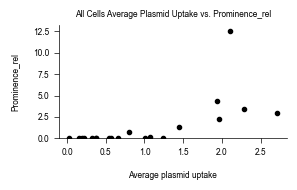

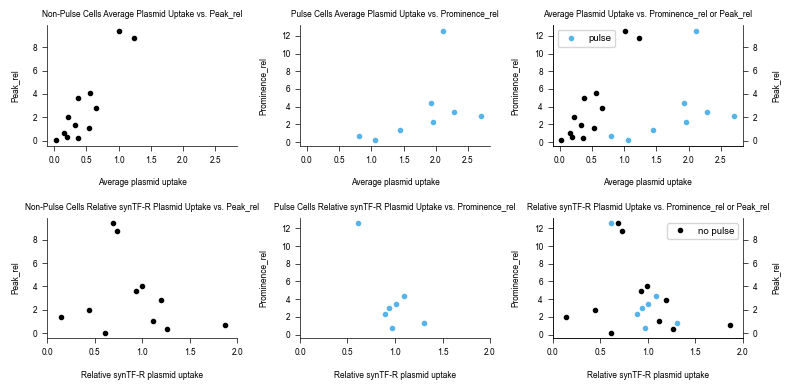

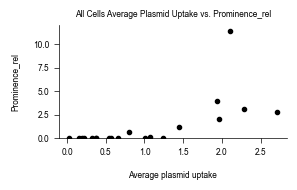

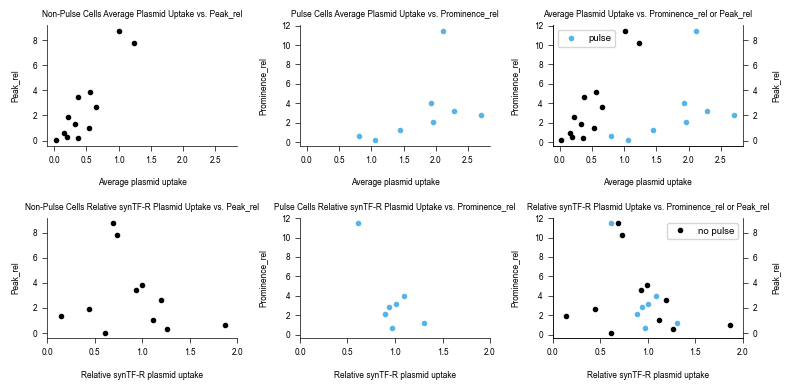

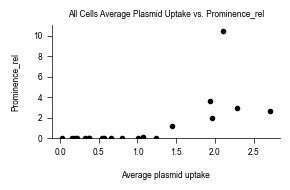

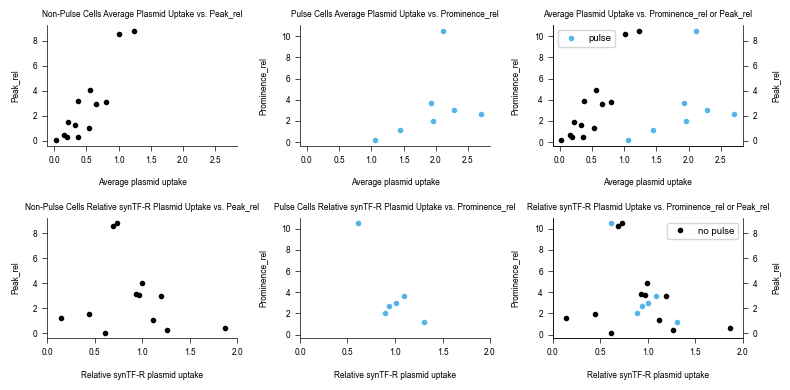

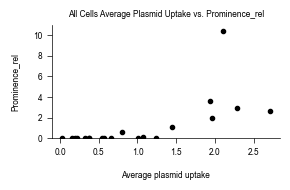

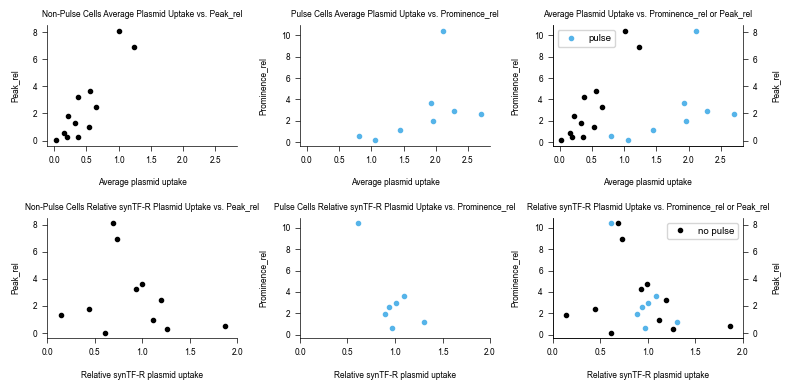

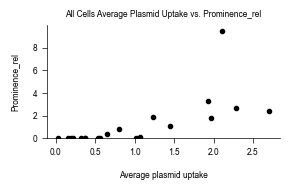

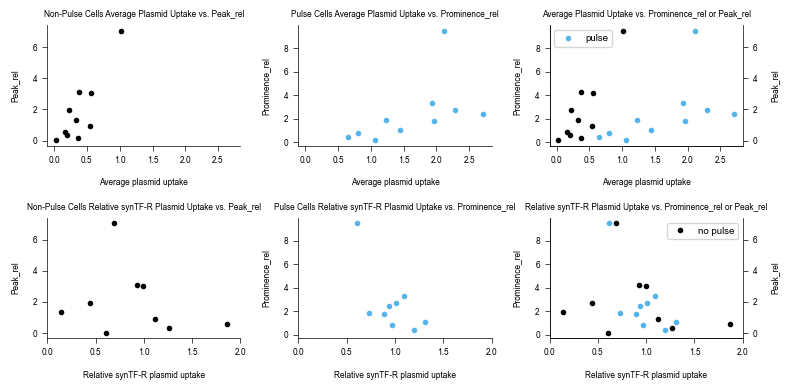

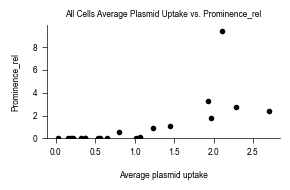

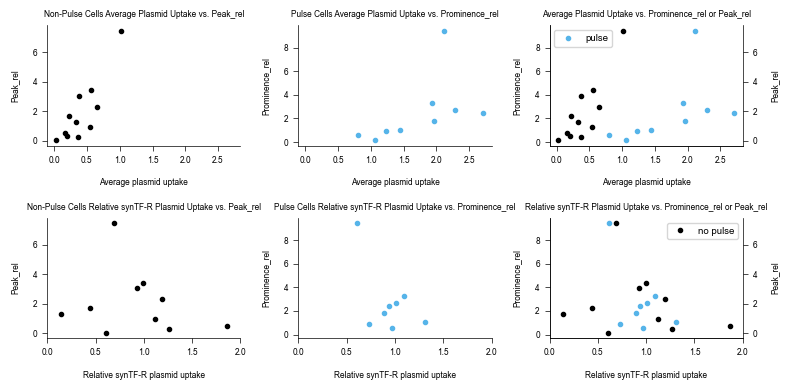

In [41]:
for index, row in all_cell_results_df20.iterrows():
    all_cell_prom_list = eval(row["single_cell_prominence"])
    all_cell_peak_list = eval(row["single_cell_peaks"])

    # fig, axs = plt.subplots(3, 2, figsize= (6, 6), sharex=True)
    avg_list = []
    avg_no_pulse = []
    avg_pulse = []

    inh_rel_no_pulse_list = []
    peak_no_pulse = []

    inh_rel_pulse_list = []
    prom_rel_pulse = []
    for cell in range(20):
        uptake_list = Z_20_df.iloc[cell].tolist()
        uptake_list_no_p0 = deepcopy(uptake_list)[:-1]
        uptake_list_no_p0.pop(0)
        avg_no_inh = np.mean(uptake_list_no_p0)
        inh_uptake = uptake_list[0]
        avg_uptake = np.mean(uptake_list)
        avg_list.append(avg_uptake)
        cell_prom = all_cell_prom_list[cell]
        if cell_prom == 0:
            avg_no_pulse.append(avg_uptake)
            peak_no_pulse.append(all_cell_peak_list[cell])
            inh_rel = inh_uptake/avg_no_inh
            inh_rel_no_pulse_list.append(inh_rel)
        else:
            avg_pulse.append(avg_uptake)
            prom_rel_pulse.append(all_cell_prom_list[cell])
            inh_rel = inh_uptake/avg_no_inh
            inh_rel_pulse_list.append(inh_rel)
                   #plot average plasmid uptake vs prominence for all cells
    fig0, ax = plt.subplots(1, 1, figsize= (3, 2)) #, sharex=True)
    ax.plot(avg_list, all_cell_prom_list, linestyle="none", marker="o", markersize="3", color="k")
    ax.set_xlabel("Average plasmid uptake")
    ax.set_ylabel("Prominence_rel")
    ax.set_ylim(bottom=0)
    ax.set_title("All Cells Average Plasmid Uptake vs. Prominence_rel")
    # plt.savefig(path_save+"all_plasmid_uptake_"+ str(index) + ".svg")

    fig, axs = plt.subplots(2, 3, figsize= (8, 4)) #, sharex=True)
    axs[0,0].plot(avg_no_pulse, peak_no_pulse, linestyle="none", marker="o", markersize="3", color="k")
    axs[0,0].set_xlabel("Average plasmid uptake")
    axs[0,0].set_ylabel("Peak_rel")
    axs[0,0].set_xlim(ax.get_xlim())
    axs[0,0].set_title("Non-Pulse Cells Average Plasmid Uptake vs. Peak_rel")

    axs[0,1].plot(avg_pulse, prom_rel_pulse, linestyle="none", marker="o", markersize="3", color=sky_blue)
    axs[0,1].set_xlabel("Average plasmid uptake")
    axs[0,1].set_ylabel("Prominence_rel")
    axs[0,1].set_xlim(ax.get_xlim())
    axs[0,1].set_title("Pulse Cells Average Plasmid Uptake vs. Prominence_rel")

    axs02_2 = axs[0,2].twinx()
    axs02_2.plot(avg_no_pulse, peak_no_pulse, linestyle="none", marker="o", markersize="3", color="k", label="no pulse")
    axs[0,2].plot(avg_pulse, prom_rel_pulse, linestyle="none", marker="o", markersize="3", color=sky_blue, label="pulse")
    axs[0,2].set_xlabel("Average plasmid uptake")
    axs[0,2].set_ylabel("Prominence_rel")
    axs02_2.set_ylabel("Peak_rel")
    axs[0,2].set_zorder(axs02_2.get_zorder()+1)
    axs[0,2].patch.set_visible(False)
    axs[0,2].spines[['right']].set_visible(True)
    axs[0,2].set_title("Average Plasmid Uptake vs. Prominence_rel or Peak_rel")
    axs[0,2].legend()

    axs[1,0].plot(inh_rel_no_pulse_list, peak_no_pulse, linestyle="none", marker="o", markersize="3", color="k")
    axs[1,0].set_xlabel("Relative synTF-R plasmid uptake")
    axs[1,0].set_ylabel("Peak_rel")
    axs[1,0].set_xlim(0, 2)
    axs[1,0].set_title("Non-Pulse Cells Relative synTF-R Plasmid Uptake vs. Peak_rel")

    axs[1,1].plot(inh_rel_pulse_list, prom_rel_pulse, linestyle="none", marker="o", markersize="3", color=sky_blue)
    axs[1,1].set_xlabel("Relative synTF-R plasmid uptake")
    axs[1,1].set_ylabel("Prominence_rel")
    axs[1,1].set_xlim(0, 2)
    axs[1,1].set_title("Pulse Cells Relative synTF-R Plasmid Uptake vs. Prominence_rel")

    axs12_2 = axs[1,2].twinx()
    axs12_2.plot(inh_rel_no_pulse_list, peak_no_pulse, linestyle="none", marker="o", markersize="3", color="k", label="no pulse")
    axs[1,2].plot(inh_rel_pulse_list, prom_rel_pulse, linestyle="none", marker="o", markersize="3", color=sky_blue, label="pulse")
    axs[1,2].set_xlabel("Relative synTF-R plasmid uptake")
    axs[1,2].set_ylabel("Prominence_rel")
    axs12_2.set_ylabel("Peak_rel")
    axs[1,2].set_zorder(axs12_2.get_zorder()+1)
    axs[1,2].patch.set_visible(False)
    axs[1,2].spines[['right']].set_visible(True)
    axs[1,2].set_xlim(0, 2)
    axs[1,2].set_title("Relative synTF-R Plasmid Uptake vs. Prominence_rel or Peak_rel")
    # axs[1,2].legend()
    axs12_2.legend()

    # plt.show()
    plt.savefig(path_save+"plasmid_uptake_plots_zoomed_"+ str(index) + ".svg")